In [153]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm ,metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = load_breast_cancer()

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [6]:
df['target'] = data.target

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.iloc[:,:-1]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
df.shape

(569, 31)

In [10]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [90]:
X_train,X_test,Y_train,Y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1:],test_size=0.2,random_state=110)

In [91]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
231,11.320,27.08,71.76,395.7,0.06883,0.03813,0.01633,0.003125,0.1869,0.05628,...,12.080,33.75,79.82,452.3,0.09203,0.1432,0.10890,0.02083,0.2849,0.07087
549,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.008160,0.1976,0.06328,...,13.030,31.45,83.90,505.6,0.12040,0.1633,0.06194,0.03264,0.3059,0.07626
103,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.030290,0.1945,0.06322,...,10.760,26.83,72.22,361.2,0.15590,0.2302,0.26440,0.09749,0.2622,0.08490
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.019690,0.1779,0.06574,...,12.400,21.90,82.04,467.6,0.13520,0.2010,0.25960,0.07431,0.2941,0.09180
34,16.130,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.077520,0.1998,0.06515,...,20.210,27.26,132.70,1261.0,0.14460,0.5804,0.52740,0.18640,0.4270,0.12330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.027990,0.1811,0.07102,...,12.880,22.91,89.61,515.8,0.14500,0.2629,0.24030,0.07370,0.2556,0.09359
381,11.040,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.020740,0.2003,0.06246,...,12.090,20.83,79.73,447.1,0.10950,0.1982,0.15530,0.06754,0.3202,0.07287
271,11.290,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.027550,0.1769,0.06270,...,12.320,16.18,78.27,457.5,0.13580,0.1507,0.12750,0.08750,0.2733,0.08022
61,8.598,20.98,54.66,221.8,0.12430,0.08963,0.03000,0.009259,0.1828,0.06757,...,9.565,27.04,62.06,273.9,0.16390,0.1698,0.09001,0.02778,0.2972,0.07712


In [146]:
svc = svm.SVC(kernel='linear',C=0.8)

In [147]:
svc.fit(X_train, Y_train.values.ravel()) 

SVC(C=0.8, kernel='linear')

In [148]:
linear_pre = svc.predict(X_test)
# Model Accuracy 
print("Accuracy:",metrics.accuracy_score(Y_test, linear_pre))

Accuracy: 0.9736842105263158


In [149]:
def confusion_m(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  tn, fp, fn, tp = cm.ravel()
  print("TN:", tn)
  print("TP:", tp)
  print("FN:", fn)
  print("FP:", fp)

In [150]:
confusion_m(Y_test, linear_pre)

[[40  1]
 [ 2 71]]
TN: 40
TP: 71
FN: 2
FP: 1


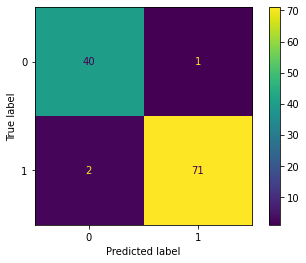

In [151]:
confusion_matrix1  =confusion_matrix(Y_test, linear_pre)
display = ConfusionMatrixDisplay(confusion_matrix1).plot()
plt.show()

In [152]:
print("Accuracy : ", metrics.accuracy_score(Y_test,linear_pre))
print("Precision : ", metrics.precision_score(Y_test,linear_pre))
print("Recall : ", metrics.recall_score(Y_test,linear_pre))

Accuracy :  0.9736842105263158
Precision :  0.9861111111111112
Recall :  0.9726027397260274


In [145]:
smg = svm.SVC(kernel='rbf')
smg.fit(X_train, Y_train.values.ravel()) 
smg_pre = smg.predict(X_test)
# Model Accuracy 
print("Accuracy : ", metrics.accuracy_score(Y_test,smg_pre))
print("Precision : ", metrics.precision_score(Y_test,smg_pre))
print("Recall : ", metrics.recall_score(Y_test,smg_pre))

Accuracy :  0.8947368421052632
Precision :  0.8961038961038961
Recall :  0.9452054794520548
